### 46 - Logistic Regression First Project

In [74]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, RocCurveDisplay, PrecisionRecallDisplay

In [4]:
#read data
df = pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
#get value counts
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

In [10]:
#convert test result into a categorical variable
df['test_result'] = df['test_result'].astype('category')

<Axes: xlabel='test_result', ylabel='count'>

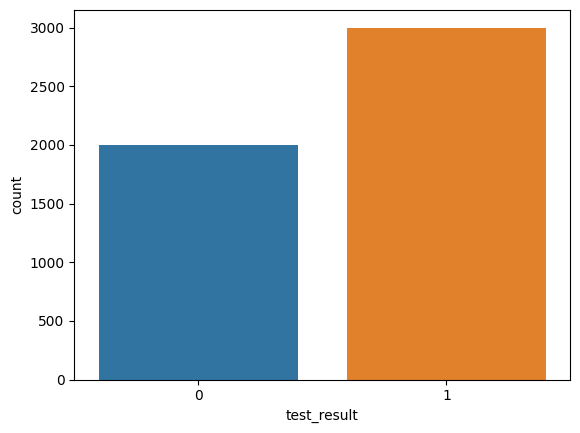

In [12]:
sns.countplot(x='test_result', data=df)

<Axes: xlabel='test_result', ylabel='age'>

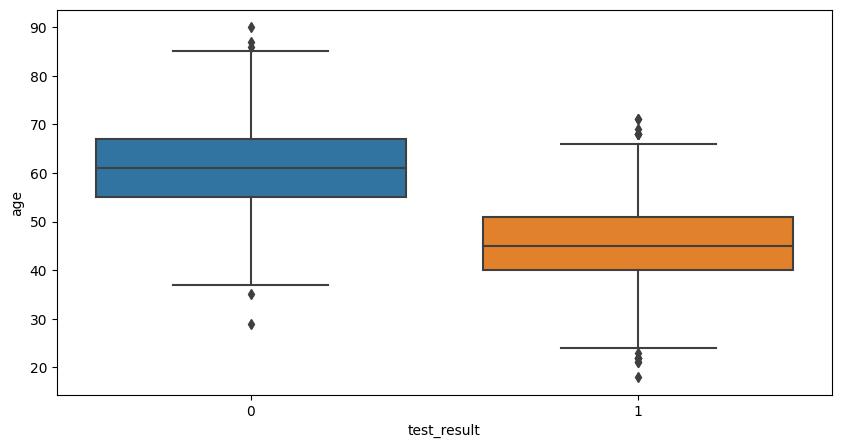

In [20]:
#create boxplot visualization of distribution
plt.figure(figsize=(10,5))
sns.boxplot(x='test_result', y='age', data=df)

<Axes: xlabel='test_result', ylabel='physical_score'>

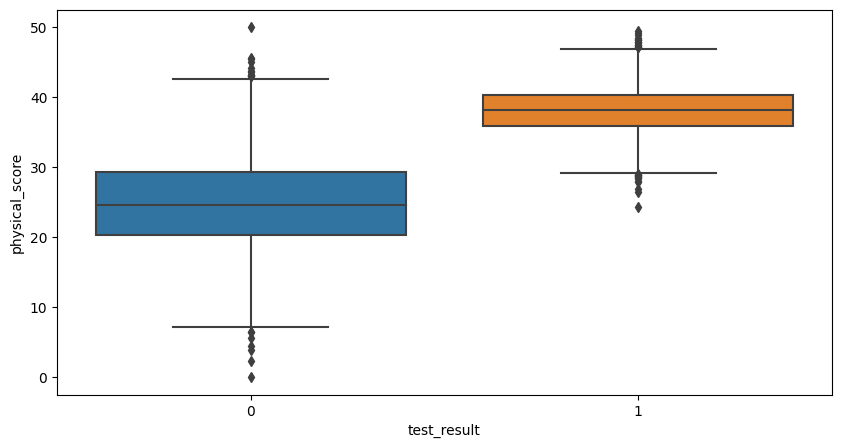

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x='test_result', y='physical_score', data=df)

<Axes: xlabel='age', ylabel='physical_score'>

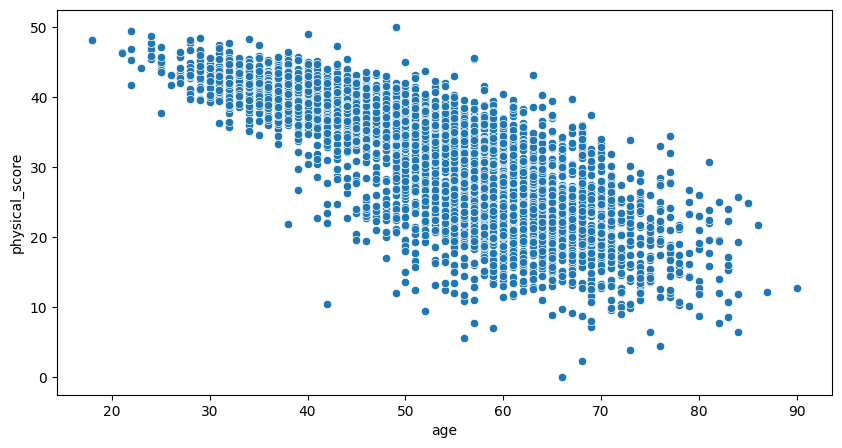

In [21]:
#see relationship between age and physical score
plt.figure(figsize=(10,5))
sns.scatterplot(x='age', y='physical_score', data=df)

<Axes: xlabel='age', ylabel='physical_score'>

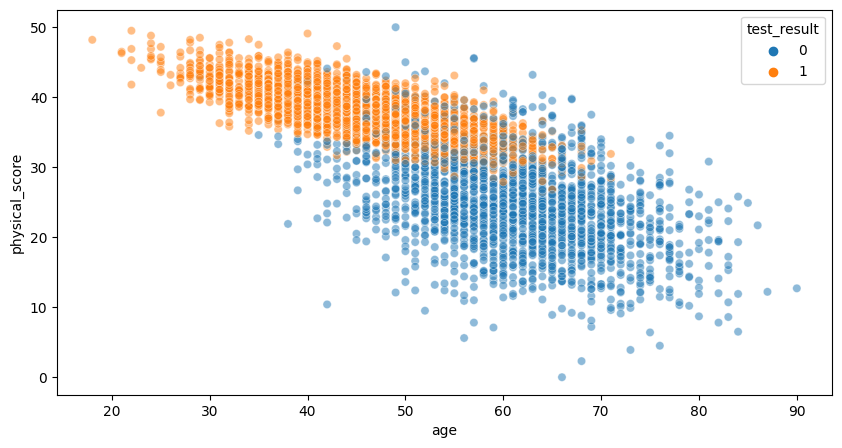

In [25]:
#add test_result hue to colour the points
#see relationship between age and physical score
plt.figure(figsize=(10,5))
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5)

<Figure size 1500x1500 with 0 Axes>

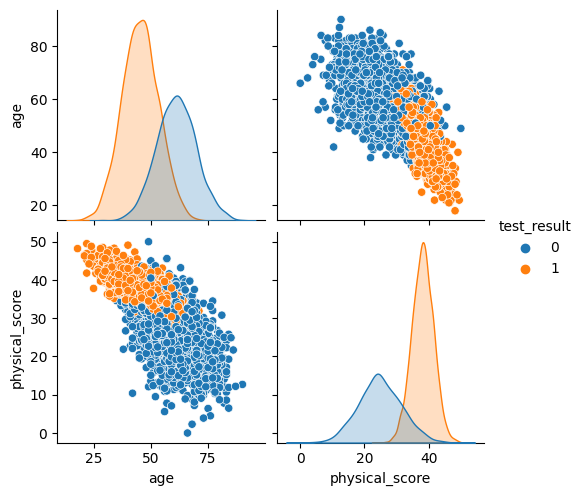

In [30]:
#create pairplot
plt.figure(figsize=(15,15))
sns.pairplot(df, hue='test_result')

<Axes: >

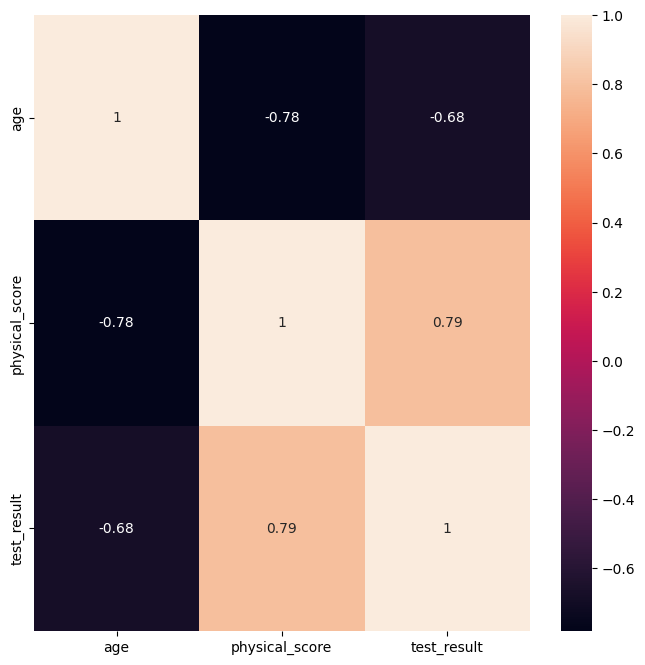

In [35]:
#create a correlated heatmap for correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

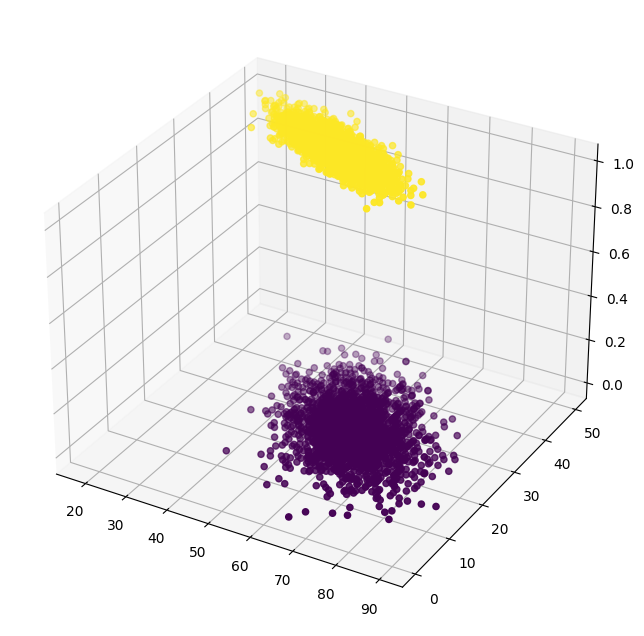

In [ ]:
#create a 3-Dimensional plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

##### Setup the machine learning process

In [42]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [49]:
scaler = StandardScaler()

In [53]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [54]:
#create an instance of logistic regression
log_model = LogisticRegression() 

In [55]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [56]:
#check for coefficients
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [58]:
#check for predictions
y_pred = log_model.predict(scaled_X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [62]:
#check for accuracy
accuracy_score(y_test, y_pred)

0.924

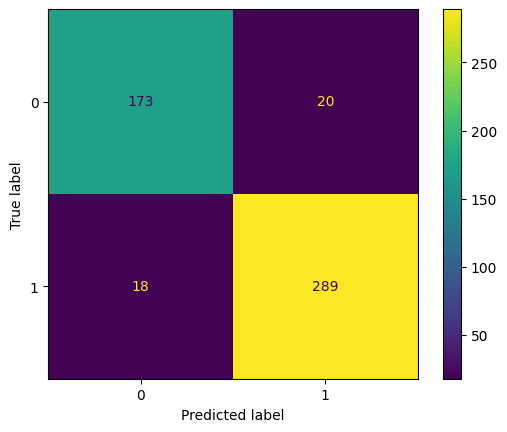

In [67]:
#plot confusion matrix
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [68]:
#Let's print this classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       193
           1       0.94      0.94      0.94       307

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [72]:
#if we wanted, print precision and recall score
precision_score(y_test, y_pred)

0.9352750809061489

In [73]:
recall_score(y_test,y_pred)

0.9413680781758957

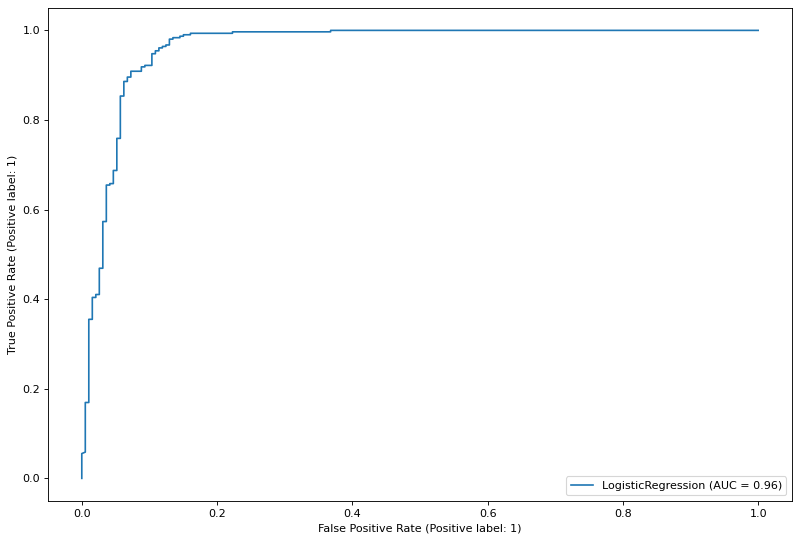

In [81]:
#plot ROC and precision recall curves.
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test, ax=ax)

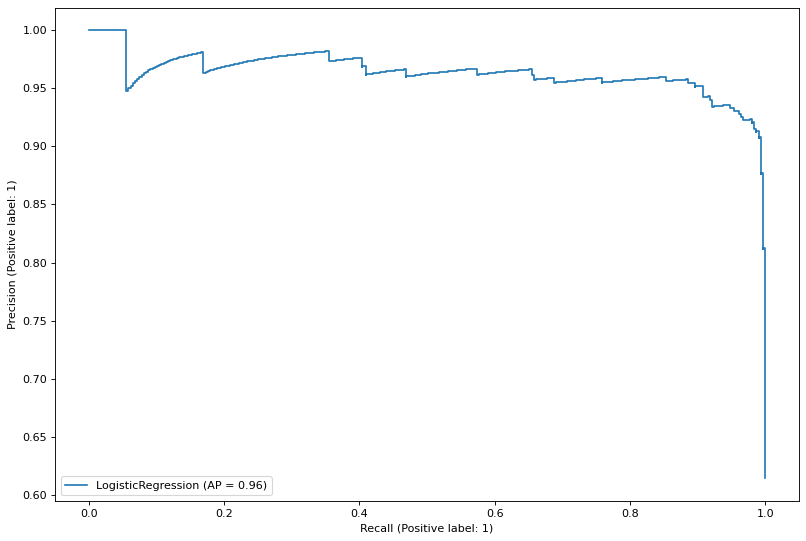

In [83]:
#finally, plot the precision recall curve
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test, ax=ax)

In [84]:
log_model.predict_proba(scaled_X_test)

array([[3.09267151e-02, 9.69073285e-01],
       [3.46183276e-02, 9.65381672e-01],
       [9.89850652e-01, 1.01493479e-02],
       [2.63867805e-03, 9.97361322e-01],
       [9.76798467e-01, 2.32015329e-02],
       [9.90296858e-01, 9.70314158e-03],
       [9.17503241e-02, 9.08249676e-01],
       [2.23885958e-02, 9.77611404e-01],
       [9.97136737e-01, 2.86326280e-03],
       [4.21538922e-02, 9.57846108e-01],
       [1.02178637e-01, 8.97821363e-01],
       [1.32310276e-02, 9.86768972e-01],
       [9.53021603e-03, 9.90469784e-01],
       [9.41001469e-01, 5.89985310e-02],
       [1.73909902e-04, 9.99826090e-01],
       [8.23877636e-02, 9.17612236e-01],
       [9.89664721e-01, 1.03352792e-02],
       [3.85833550e-03, 9.96141665e-01],
       [7.99114453e-04, 9.99200886e-01],
       [9.96617310e-01, 3.38268988e-03],
       [8.93305492e-01, 1.06694508e-01],
       [1.57519985e-01, 8.42480015e-01],
       [5.84191779e-01, 4.15808221e-01],
       [4.37511514e-02, 9.56248849e-01],
       [4.394643

In [85]:
#predict a data point
y_test[0]

1